$\color{brown}{\text{HCIN 620 Lab 4 Supervised Learning Using Classification Algorithms}}$

In this lab we will learn to apply two ML classification algorithms to predict what causes heart disease. The dataset for this lab was made publicly available on Kaggle by Ronit using UCI de-identified cata donated by David W. Aha.

[Heart Disease UCI data dictionary](https://www.kaggle.com/ronitf/heart-disease-uci)

The original dataset is published at [link text](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

Notebook by Reza Afra, Ph.D. and Barbara Berkovich, Ph.D., M.A.

Last update December 28, 2020

# **STEP 1: Environment Setup** 

**Import Code Libraries**


<br/>**Question 1**<br/>
Using your knowledge from modules 2 and 3, type the code to import the libraries for pandas, numpy, matplotlib (ggplot) and seaborn. Add a print statement to acknowledge that this step has been run.

**Run Import 1** for Input/output and plotting


In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import io 
import plotly.express as px 


**Import 2** The sklearn preprocessing classes include OrdinalEncoder, StandardScaler, train_test_split, and new classes you'll be introduced to later in the lab. We also bring in classes to evaluate the models. This import also supresses pesky warnings, resulting in a cleaner run package.

**Run import 2** for preprocessing and evaluation libraries



In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier


**Run Import 3** for machine learning algorithms.

# **STEP 2: Data Cleaning**

**Use the Folder and upload icons (left) to upload data-lab-4-heart.csv**

**Run the code** to read the heart data in the Colab Runtime Environment.

In [13]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')

**Question 2** </br>
Insert the Python command to display first 10 rows of data and run it. Always look at the data before doing anything else.

**Run the code.**

In [14]:
# Answer 2: Enter the command to generate a dataset header in this cell.

data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


 Identify the categorical variables by inspections.  

**Question 3** Edit this text box to list the categorical variables

Answer: Fill in categorical variable names on the list below. Add as many lines as needed.

1.   **Type variable 1 name**
2.   **Type variable 2 name**

Here are the descriptions of each column.
*   **age** age
*   **sex** sex
*   **cp**  chest pain type (4 values)
*   **trestbps** resting blood pressure
*   **chol**    serum cholestoral in mg/dl
*   **fbs**     fasting blood sugar > 120 mg/dl
*   **restecg** resting electrocardiographic results (values 0,1,2)
*   **thalach**  maximum heart rate achieved
*   **exang**   exercise induced angina
*   **oldpeak** ST depression induced by exercise relative to rest
*   **slope**   the slope of the peak exercise ST segment
*   **ca**      number of major vessels (0-3) colored by flourosopy
*   **thal**    3 = normal; 6 = fixed defect; 7 = reversable defect
*   **target**  

##Check for missing values


**Question 4** Enter the code to check for missing values, and then run it.


In [15]:
## Answer 4: Enter the code to check for missing values.

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Another step in data cleaning involves checking for duplicate values. Before making any more changes to the dataset, determine the number of rows and columns in the dataset using the shape command.

**Question 5** </br> Before making any more changes to the dataset, determine the number of rows and columns in the dataset using the shape command.

In [16]:
#Answer 5: Enter the shape command in this cell, and run it.
data.duplicated().sum()

1

## Check for duplicates


**Question 6** Enter the code to check for duplicates using the drop_duplicates command and run it.



In [20]:
##Answer 6: Enter the drop_duplicates command

data=data.drop_duplicates()

**Question 7** Repeat the shape command, and run it.

In [21]:
# Answer 7: Repeat the shape command 

data.shape

(302, 14)

**Question 8** Edit this cell to answer the questions:

**Answer 8**
1.  How many rows are there now? [Type answer here]
2.  How many duplicates were dropped? [Type answer here]

# **STEP 3: Exploratory Data Analysis (EDA) and Preprocessing**

##Descriptive Statistics

**Question 9** </br> Use the **describe** command to display descriptive statistics for continuous variables in the data frame. Include the .05 and .95 percentiles. Include the following columns in the table:
age, trestbps, chol, thalach, oldpeak.

In [22]:
## Answer 9 Enter the describe command in this cell.

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Question 10**

Answer the following questions based on the table above.

**Answer 10**
1.  How many people are in this dataset?    [Type answer here]
2.  What is the range of ages?           [Type answer here] 
3.  List the mean and 50th percentile for Chol.  [Type answer here]
4.  Explain the difference between the mean and the 50th percentile. [Type answer here]
5.  What is the clinical significance? [Type answer here]



**Question 11** Let's look more closely at the distribution of cholestrol in patients. Enter the seaborn (sns) command to plot a histogram of chol.

<AxesSubplot:xlabel='chol', ylabel='Count'>

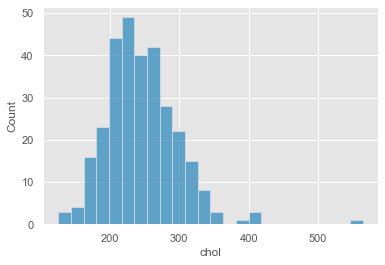

In [23]:
# Answer 11: Enter code to plot a histogram of cholesterol lab results
sns.histplot(data['chol'])

## Check for outliers

**Question 12**  
Enter the seaborn (sns) command to generate a boxplot of chol.

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='chol'>

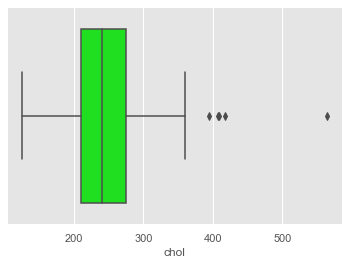

In [25]:
#Answer 12: Box Plot of Cholesterol 

sns.boxplot(data['chol'], color='lime')

**Question 13** </br>

Use the two plots to answer the following questions. Enter the answers in this text cell.

**Answer 13**

1. Are there outliers in cholestrol measurements? [Type answer here]
2. How many? [Type answer here]


##Select target and features

**The Target is what we want to predict.** In our pre-labeled dataset, the variable called "target" refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. 

**The Features are variables used by the model to predict the target.**

**Question 14** 
Edit this text cell with your answers to the following questions.

**Answer 14**
1. Which features do you think might be the most important features in this dataset for predicting heart disease? [Type answer here]
2  Why? [Type answer here]


**Question 15** 

Run a correlation table that shows how all of the columns correlate with the target variable. Sort the values in ascending order.

In [30]:
## Answer 15: Enter the correlation of each column to the target
data.corr()['chol'].sort_values(ascending=False)


chol        1.000000
age         0.207216
trestbps    0.125256
thal        0.096810
ca          0.086878
exang       0.064099
oldpeak     0.050086
fbs         0.011428
slope       0.000417
thalach    -0.005308
cp         -0.072682
target     -0.081437
restecg    -0.147602
sex        -0.195571
Name: chol, dtype: float64

**Question 16** Edit this text box to identify the top four features correlated with target? Remember that the magnitude of the correlation is more important than the sign (+/-).

**Answer 16**

1. [Type Feature 1 here], [type correlation value]
2. [Type Feature 2 here], [type correlation value]
3. [Type Feature 3 here], [type correlation value]
4. [Type Feature 4 here], [type correlation value]


Run the code below to generate a heatmap.

<AxesSubplot:>

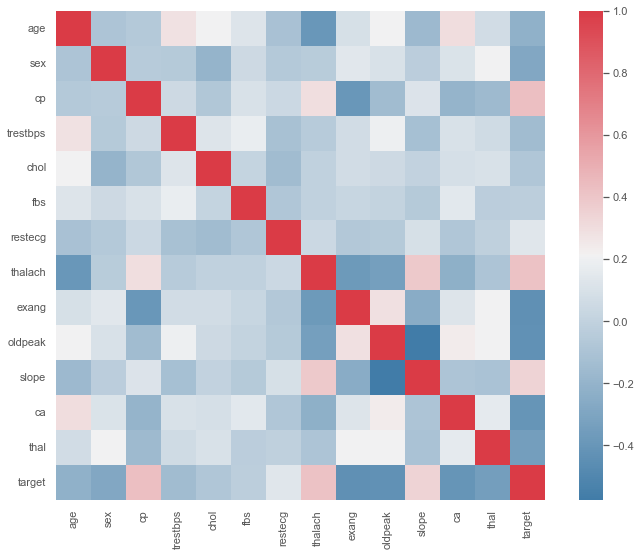

In [37]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=bool), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)

Red is the highest correlation. The diagonal red line shows that each variable is 100% correlated with itself. Pink and light blue show weaker correlations.

**Question 17**</br>
 List a few correlated features not identified in question 9, along with their approximate correlation coefficients. Estimate using the color legend on the right. 

 **Answer 17**

 1. [Type Pair 1 here], [correlation coefficient]
 2. [Type Pair 2 here], [correlation coefficient]
 3. [Type Pair 3 here], [correlation coefficient]

##Isolate features from target

The first step in preprocessing is to create a features dataframe that does not include the target variable. Run the code below to do that. We assign the number of attributes (remaining columns) to the variable features. 

In [46]:
features = data.drop(columns=['target'])
y = data['target']

##Build pipeline for scaling and encoding

You identified the categorical and continuous variables in questions 3 and 5 respectively. Now we perform a standard scaling on numerical columns and ordinal encoding on the categorical columns. The code to do this uses a pipeline to combine several transformations into one step. Then, the transformed data is assigned to X, and the target is assigned to Y. 

In [50]:
full_pipeline = ColumnTransformer([ 
    ('num', StandardScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
    ('cat', OrdinalEncoder(), ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal'])
])
x = pd.DataFrame(full_pipeline.fit_transform(features))


**Question 18** <br>
Edit this text box to answer the questions below.

**Answer 18**

1. What justifies the use of ordinal encoding on our categorical columns? [Type answer here]
2. In what situations can we use ordinal encoding? [Type answer here]



**Run the code** to view the transformed data.

In [51]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##Split the data

Just like we did in Module 3 we split the data

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#**STEP 4: Build the Models** 
The purpose of feature engineering in general is to find the best features for the least complex model. Here we take the easiest route and include all features to establish a baseline. Remember to always start from the simplest nontrivial model. In future tuning of the models, we may find that some features work better than others for predicting whether the patient has heart disease.

##Logistic Regression

The first algorithm we are going to use is logistic regression.

**Run the code** for training and testing the logistic regression model. The code outputs the level of accuracy between the predicted and test values.

In [53]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print(f'Accuracy test is {accuracy_score(y_test, y_pred):.3f}')

Accuracy test is 0.836


##Confusion Matrix

The confusion matrix is a visualization of the actual number of True Positives and Negatives, and False Positives and Negatives.

##K-Nearest Neighbors

<br/>The next classification algorithm is k-nearest neighbors. 


**Run the code** for training and testing the k nearest neighbors model. The code outputs the level of accuracy between the predicted and test values.

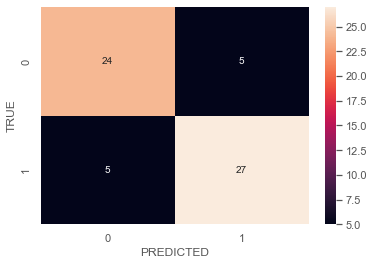

In [55]:
data_ = {'y_true':y_test,
        'y_pred': y_pred
        }

df = pd.DataFrame(data_, columns=['y_true','y_pred'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_pred'], rownames=['TRUE'], colnames=['PREDICTED'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

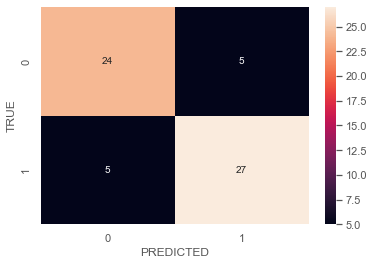

In [56]:
data_ = {'y_true':y_test,
        'y_pred': y_pred
        }

df = pd.DataFrame(data_, columns=['y_true','y_pred'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_pred'], rownames=['TRUE'], colnames=['PREDICTED'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

##Confusion Matrix

The confusion matrix is a visualization of the actual number of True Positives and Negatives, and False Positives and Negatives.

## Model Tuning

Some models can be fine-tuned by changing processing parameters. In this case, we'd like to find out how many neighbors is optimal. To that end, we test from 1 to 20 neighbors. 

**Run the code** to plot the accuracy of the model(x) based on the number of neighbors(y).

**Question 19** Based on the linegraph, what is the optimal integer number of neighbors (which optimizes the accuracy).

**Answer 19** [Type answer here]

**Run the code** to check the answer mathematically.

In this lab we saw that with very simple algorithms and no feature engineering, we were able to achieve 84.6% accuracy. There are more elaborate models and tricks that could be used to achieve better accuracy. Whether or not that would be a good idea depends on the intended use of the model predictions.

**Have Fun** Try your hand at adding code to run another classification algorithm. Can you determine the accuracy? Did you beat the 84.6% accuracy of the K-nearest neighbors classification?